In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


# embedded methods
from sklearn.linear_model import LassoCV

# Encoding
from sklearn.preprocessing import LabelEncoder

# Modelling and report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier

# Imbalanced dataset
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train.csv')
data_train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [3]:
data_validation = pd.read_csv('test.csv')
data_validation.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [4]:
#data_train.info()

In [5]:
data_train.set_index('encounter_id', inplace = True)

In [6]:
data_validation.set_index('encounter_id', inplace = True)

In [7]:
# Count the occurrences of "?" or NaN in each column
question_mark_nan_count = data_train.applymap(lambda x: x == '?' or pd.isna(x)).sum()

# Calculate the percentage of "?" or NaN values in each column
percentage_question_mark_nan = (question_mark_nan_count / len(data_train)) * 100

# Print the result
print(percentage_question_mark_nan)  # values in percent

# --> Almost no values for weight, glucose_test_result, alc_test_result

country                                   0.000000
patient_id                                0.000000
race                                      7.117188
gender                                    0.000000
age                                       4.993262
weight                                   96.847100
payer_code                               39.588130
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.202426
medical_specialty                        49.022966
average_pulse_bpm                         0.000000
discharge_disposition                     3.635802
admission_source                          6.623056
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications                     0.000000
primary_diagnosis              

In [8]:
#data_train.describe(include = "all").T
data_train.shape

(71236, 30)

# Pre Processing

In [9]:
# too many missing values
data_train = data_train.drop(columns=['weight', 'payer_code', 'medical_specialty', 'glucose_test_result', 'a1c_test_result', 'patient_id', 'admission_type'])

In [10]:
data_train = data_train.drop(columns=['country']) ## only 1 country

In [11]:
data_validation = data_validation.drop(columns=['country', 'weight', 'payer_code', 'medical_specialty', 'glucose_test_result', 'a1c_test_result', 'patient_id', 'admission_type'])

In [12]:
data_train.head()

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,discharge_disposition,admission_source,length_of_stay_in_hospital,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,Female,[70-80),0,0,2,127,Discharged to home,Emergency Room,2,...,20,515,276,466,8,No,No,[],No,>30 days
426224,AfricanAmerican,Male,[50-60),0,0,0,128,Discharged/transferred to a federal health car...,Clinic Referral,14,...,25,38,785,162,9,No,Yes,['insulin'],No,No
634063,Caucasian,Female,[60-70),0,0,1,94,Discharged to home,NaN,6,...,22,534,135,250,6,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,AfricanAmerican,Male,[60-70),0,0,1,81,Discharged to home,Transfer from another health care facility,6,...,9,569,562,455,5,No,No,[],No,No
654194,Caucasian,Female,[70-80),1,0,0,126,Discharged/transferred to home with home healt...,Physician Referral,6,...,15,715,599,428,9,No,No,[],No,>30 days


In [13]:
## replace all '?' with Nan
data_train.replace('?', np.nan, inplace=True)

In [14]:
data_validation.replace('?', np.nan, inplace=True)

In [15]:
data_train.isna().sum() / (len(data_train)) * 100

race                                     7.117188
gender                                   0.000000
age                                      4.993262
outpatient_visits_in_previous_year       0.000000
emergency_visits_in_previous_year        0.000000
inpatient_visits_in_previous_year        0.000000
average_pulse_bpm                        0.000000
discharge_disposition                    3.635802
admission_source                         6.623056
length_of_stay_in_hospital               0.000000
number_lab_tests                         0.000000
non_lab_procedures                       0.000000
number_of_medications                    0.000000
primary_diagnosis                        0.022461
secondary_diagnosis                      0.367792
additional_diagnosis                     1.415015
number_diagnoses                         0.000000
change_in_meds_during_hospitalization    0.000000
prescribed_diabetes_meds                 0.000000
medication                               0.000000


In [16]:
## Copy df for mode imputing
data_train_mode = data_train.copy()

In [17]:
data_validation_mode = data_validation.copy()

In [18]:
# # Fill with mode

# # Define the columns with missing values
# columns_with_missing_mode = ['race', 'age', 'discharge_disposition', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']
# # Loop through each column and impute with the most common value
# for column in columns_with_missing_mode:
#     most_common_value = data_train_mode[column].mode()[0]
#     data_train_mode[column].fillna(most_common_value, inplace=True)

In [19]:
## Dropping all rows with nan

# List of columns to check for NaN values
columns_to_check = ['admission_source', 'race', 'age',
                    'discharge_disposition', 'primary_diagnosis',
                    'secondary_diagnosis', 'additional_diagnosis']

# Drop rows with NaN values in any of the specified columns
data_train_mode = data_train_mode.dropna(subset=columns_to_check)

In [20]:
data_train_mode.isna().sum() / (len(data_train_mode)) * 100

race                                     0.0
gender                                   0.0
age                                      0.0
outpatient_visits_in_previous_year       0.0
emergency_visits_in_previous_year        0.0
inpatient_visits_in_previous_year        0.0
average_pulse_bpm                        0.0
discharge_disposition                    0.0
admission_source                         0.0
length_of_stay_in_hospital               0.0
number_lab_tests                         0.0
non_lab_procedures                       0.0
number_of_medications                    0.0
primary_diagnosis                        0.0
secondary_diagnosis                      0.0
additional_diagnosis                     0.0
number_diagnoses                         0.0
change_in_meds_during_hospitalization    0.0
prescribed_diabetes_meds                 0.0
medication                               0.0
readmitted_binary                        0.0
readmitted_multiclass                    0.0
dtype: flo

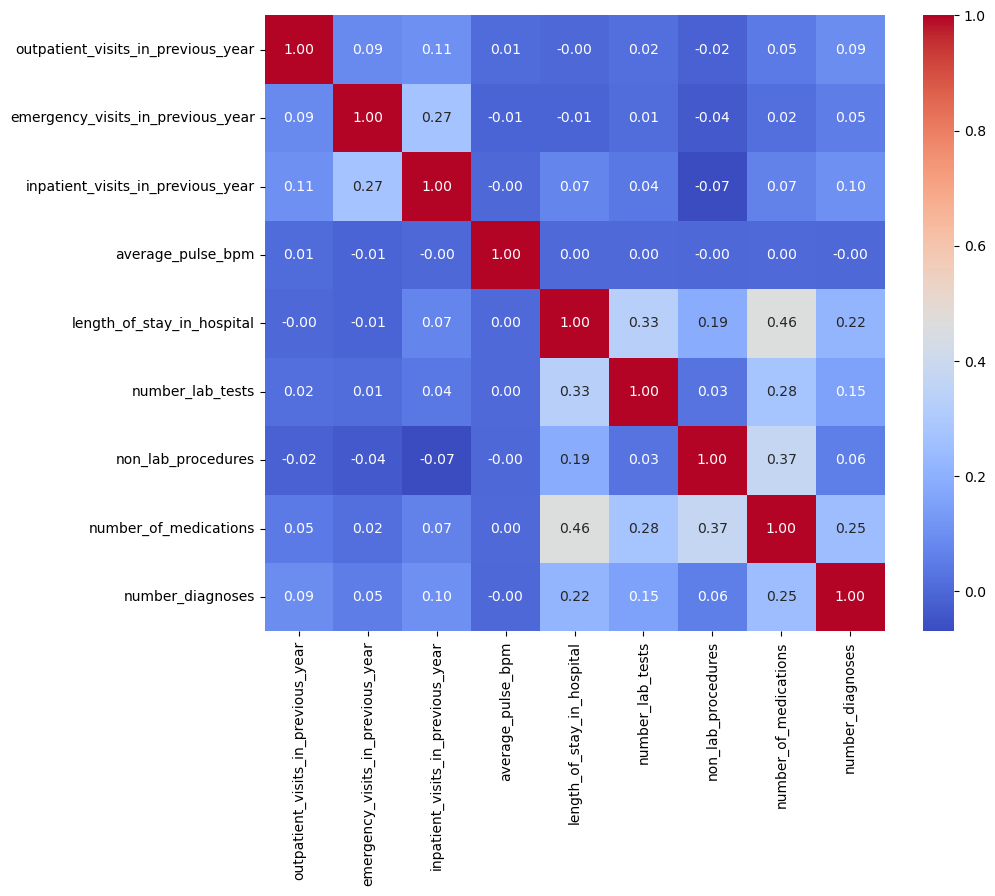

In [21]:
# Select only the numerical columns
numerical_df = data_train_mode.select_dtypes(include=['number'])

# Normalize columns
scaler = MinMaxScaler()
normalized_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

# Calculate the correlation matrix
correlation_matrix = normalized_numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.show()

In [22]:
## no correlation 'average_pulse_bpm'
data_train_corr = data_train_mode.drop(columns=['average_pulse_bpm'])

In [23]:
data_validation_corr = data_validation_mode.drop(columns=['average_pulse_bpm'])

In [24]:
data_train_corr.head(10)

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,discharge_disposition,admission_source,length_of_stay_in_hospital,number_lab_tests,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,Female,[70-80),0,0,2,Discharged to home,Emergency Room,2,48,...,20,515,276,466,8,No,No,[],No,>30 days
426224,AfricanAmerican,Male,[50-60),0,0,0,Discharged/transferred to a federal health car...,Clinic Referral,14,71,...,25,38,785,162,9,No,Yes,['insulin'],No,No
890610,AfricanAmerican,Male,[60-70),0,0,1,Discharged to home,Transfer from another health care facility,6,48,...,9,569,562,455,5,No,No,[],No,No
654194,Caucasian,Female,[70-80),1,0,0,Discharged/transferred to home with home healt...,Physician Referral,6,47,...,15,715,599,428,9,No,No,[],No,>30 days
269878,Caucasian,Female,[50-60),0,0,0,Discharged to home,Emergency Room,3,58,...,10,574,250,244,3,No,No,[],No,>30 days
182051,Caucasian,Female,[50-60),0,0,0,Discharged to home,Emergency Room,1,59,...,13,786,250.02,493,9,Ch,Yes,"['metformin', 'glimepiride']",No,No
964239,Other,Male,[70-80),0,0,0,Discharged/transferred to home with home healt...,Physician Referral,6,56,...,39,414,287,276,9,Ch,Yes,"['nateglinide', 'glipizide', 'insulin']",No,No
418598,Caucasian,Female,[50-60),1,0,0,Discharged to home,Physician Referral,3,55,...,16,682,250.02,276,9,No,Yes,['insulin'],No,No
760130,Caucasian,Female,[70-80),0,0,0,Discharged to home,Physician Referral,8,40,...,21,425,398,745,9,No,Yes,['insulin'],No,>30 days


# Encoding

In [25]:
## Encode age seperate

# Define the mapping
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 4,
    '[40-50)': 5,
    '[50-60)': 6,
    '[60-70)': 7,
    '[70-80)': 8,
    '[80-90)': 9,
    '[90-100)': 10
}

# Apply the mapping to the 'age' column
data_train_corr['age'] = data_train_corr['age'].map(age_mapping)

In [26]:
data_validation_corr['age'] = data_validation_corr['age'].map(age_mapping)

In [27]:
## Encode gender seperate

# manually dropt 3 rows where gender is nan
data_train_corr = data_train_corr.dropna(subset=['gender'])

# Drop rows where 'gender' is equal to 'Unknown/Invalid'
data_train_corr = data_train_corr[data_train_corr['gender'] != 'Unknown/Invalid']

data_train_corr['gender'] = data_train_corr['gender'].map({'Male': 1, 'Female': 0})






In [28]:
data_validation_corr['gender'] = data_validation_corr['gender'].map({'Male': 1, 'Female': 0})

In [29]:
data_validation_corr['gender'].isna().sum()

0

In [30]:
## Encode diagnosis columns according to chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.cdc.gov/nchs/data/icd/icd9cm_guidelines_2011.pdf ----> chapter 3.....

def encode_diagnosis(x):
    if pd.isna(x):
        return 0
    elif x < 0:
        return 17
    elif 1 <= x < 140:
        return 0
    elif 140 <= x < 240:
        return 1
    elif 240 <= x < 280:
        return 2
    elif 280 <= x < 290:
        return 3
    elif 290 <= x < 320:
        return 4
    elif 320 <= x < 390:
        return 5
    elif 390 <= x < 460:
        return 6
    elif 460 <= x < 520:
        return 7
    elif 520 <= x < 580:
        return 8
    elif 580 <= x < 630:
        return 9
    elif 630 <= x < 680:
        return 10
    elif 680 <= x < 710:
        return 11
    elif 710 <= x < 740:
        return 12
    elif 740 <= x < 760:
        return 13
    elif 760 <= x < 780:
        return 14
    elif 780 <= x < 800:
        return 15
    elif 800 <= x < 1000:
        return 16
    else:
        return x

# Encode 'primary_diagnosis' column
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].astype(str)
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].str.replace('?', '0')
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].str.replace('V', '-')
data_train_corr['primary_diagnosis'] = pd.to_numeric(data_train_corr['primary_diagnosis'], errors='coerce', downcast='integer')
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_train_corr['primary_diagnosis'] = data_train_corr['primary_diagnosis'].apply(encode_diagnosis)

# Encode 'secondary_diagnosis' column
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].astype(str)
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].str.replace('?', '0')
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].str.replace('V', '-')
data_train_corr['secondary_diagnosis'] = pd.to_numeric(data_train_corr['secondary_diagnosis'], errors='coerce', downcast='integer')
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_train_corr['secondary_diagnosis'] = data_train_corr['secondary_diagnosis'].apply(encode_diagnosis)

# Encode 'additional_diagnosis' column
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].astype(str)
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].str.replace('?', '0')
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].str.replace('V', '-')
data_train_corr['additional_diagnosis'] = pd.to_numeric(data_train_corr['additional_diagnosis'], errors='coerce', downcast='integer')
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_train_corr['additional_diagnosis'] = data_train_corr['additional_diagnosis'].apply(encode_diagnosis)


In [31]:
# Encode 'primary_diagnosis' column
data_validation_corr['primary_diagnosis'] = data_validation_corr['primary_diagnosis'].astype(str)
data_validation_corr['primary_diagnosis'] = data_validation_corr['primary_diagnosis'].str.replace('?', '0')
data_validation_corr['primary_diagnosis'] = data_validation_corr['primary_diagnosis'].str.replace('V', '-')
data_validation_corr['primary_diagnosis'] = pd.to_numeric(data_validation_corr['primary_diagnosis'], errors='coerce', downcast='integer')
data_validation_corr['primary_diagnosis'] = data_validation_corr['primary_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_validation_corr['primary_diagnosis'] = data_validation_corr['primary_diagnosis'].apply(encode_diagnosis)

# Encode 'secondary_diagnosis' column
data_validation_corr['secondary_diagnosis'] = data_validation_corr['secondary_diagnosis'].astype(str)
data_validation_corr['secondary_diagnosis'] = data_validation_corr['secondary_diagnosis'].str.replace('?', '0')
data_validation_corr['secondary_diagnosis'] = data_validation_corr['secondary_diagnosis'].str.replace('V', '-')
data_validation_corr['secondary_diagnosis'] = pd.to_numeric(data_validation_corr['secondary_diagnosis'], errors='coerce', downcast='integer')
data_validation_corr['secondary_diagnosis'] = data_validation_corr['secondary_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_validation_corr['secondary_diagnosis'] = data_validation_corr['secondary_diagnosis'].apply(encode_diagnosis)

# Encode 'additional_diagnosis' column
data_validation_corr['additional_diagnosis'] = data_validation_corr['additional_diagnosis'].astype(str)
data_validation_corr['additional_diagnosis'] = data_validation_corr['additional_diagnosis'].str.replace('?', '0')
data_validation_corr['additional_diagnosis'] = data_validation_corr['additional_diagnosis'].str.replace('V', '-')
data_validation_corr['additional_diagnosis'] = pd.to_numeric(data_validation_corr['additional_diagnosis'], errors='coerce', downcast='integer')
data_validation_corr['additional_diagnosis'] = data_validation_corr['additional_diagnosis'].apply(lambda x: round(x) if not pd.isna(x) else x)
data_validation_corr['additional_diagnosis'] = data_validation_corr['additional_diagnosis'].apply(encode_diagnosis)


In [32]:
## drop additional diagnosis

# data_train_corr = data_train_corr.drop(columns=['additional_diagnosis'])

In [33]:
# ## LabelEncoding

# # Create a label encoder
# label_encoder = LabelEncoder()

# # Define the columns you want to encode
# columns_to_encode = ['discharge_disposition', 'race', 'admission_source']

# # Loop through each column and apply label encoding
# for column in columns_to_encode:
#     data_train_corr[column] = label_encoder.fit_transform(data_train_corr[column])

In [34]:
data_train_corr.head()

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,discharge_disposition,admission_source,length_of_stay_in_hospital,number_lab_tests,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,0,8,0,0,2,Discharged to home,Emergency Room,2,48,...,20,7,2,7,8,No,No,[],No,>30 days
426224,AfricanAmerican,1,6,0,0,0,Discharged/transferred to a federal health car...,Clinic Referral,14,71,...,25,0,15,1,9,No,Yes,['insulin'],No,No
890610,AfricanAmerican,1,7,0,0,1,Discharged to home,Transfer from another health care facility,6,48,...,9,8,8,6,5,No,No,[],No,No
654194,Caucasian,0,8,1,0,0,Discharged/transferred to home with home healt...,Physician Referral,6,47,...,15,12,9,6,9,No,No,[],No,>30 days
269878,Caucasian,0,6,0,0,0,Discharged to home,Emergency Room,3,58,...,10,8,2,2,3,No,No,[],No,>30 days


In [35]:
## Use One Hot Encoder technique

data_train_hot_encoded = pd.get_dummies(data_train_corr, columns=['discharge_disposition'], prefix='race').replace({True: 1, False: 0})
data_train_hot_encoded = pd.get_dummies(data_train_hot_encoded, columns=['race'], prefix='admission_type').replace({True: 1, False: 0})
data_train_hot_encoded = pd.get_dummies(data_train_hot_encoded, columns=['admission_source'], prefix='admission_source').replace({True: 1, False: 0})

In [36]:
data_validation_hot_encoded = pd.get_dummies(data_validation_corr, columns=['discharge_disposition'], prefix='race').replace({True: 1, False: 0})
data_validation_hot_encoded = pd.get_dummies(data_validation_hot_encoded, columns=['race'], prefix='admission_type').replace({True: 1, False: 0})
data_validation_hot_encoded = pd.get_dummies(data_validation_hot_encoded, columns=['admission_source'], prefix='admission_source').replace({True: 1, False: 0})


In [37]:
## Encode seperately the following columns

data_train_hot_encoded['change_in_meds_during_hospitalization'] = data_train_hot_encoded['change_in_meds_during_hospitalization'].map({'Ch': 1, 'No': 0})
data_train_hot_encoded['prescribed_diabetes_meds'] = data_train_hot_encoded['prescribed_diabetes_meds'].map({'Yes': 1, 'No': 0})

In [38]:
data_validation_hot_encoded['change_in_meds_during_hospitalization'] = data_validation_hot_encoded['change_in_meds_during_hospitalization'].map({'Ch': 1, 'No': 0})
data_validation_hot_encoded['prescribed_diabetes_meds'] = data_validation_hot_encoded['prescribed_diabetes_meds'].map({'Yes': 1, 'No': 0})

In [39]:
data_train_hot_encoded.dtypes

gender                                                                         int64
age                                                                            int64
outpatient_visits_in_previous_year                                             int64
emergency_visits_in_previous_year                                              int64
inpatient_visits_in_previous_year                                              int64
                                                                               ...  
admission_source_ Transfer from hospital inpt/same fac reslt in a sep claim    int64
admission_source_Clinic Referral                                               int64
admission_source_HMO Referral                                                  int64
admission_source_Normal Delivery                                               int64
admission_source_Transfer from a hospital                                      int64
Length: 61, dtype: object

In [40]:
# ## column medication

# # Remove rows with NaN values in the 'medication' column
# data_train_hot_encoded = data_train_hot_encoded.dropna(subset=['medication'])

# # Extract unique medications from the 'medication' column
# unique_medications = set()

# # Iterate through each row in the 'medication' column and add the medications to the set
# for medication_list in data_train_hot_encoded['medication']:
#     medications = medication_list.strip('[]').replace(" ", "").split(',')
#     unique_medications.update(medications)

# # Convert the set to a list to count the unique medications
# unique_medications_list = list(unique_medications)

# # Create binary columns for each unique medication and set values to 1 if present, 0 if not
# for medication in unique_medications_list:
#     data_train_hot_encoded[medication] = data_train_hot_encoded['medication'].apply(lambda x: 1 if medication in x else 0)

# # Drop the original 'medication' column
# data_train_hot_encoded = data_train_hot_encoded.drop(columns=['medication'])

In [41]:
## medication

# 1 if record has medication insulin in it else 0 
data_train_hot_encoded['has_insulin'] = data_train_hot_encoded['medication'].apply(lambda x: 1 if 'insulin' in x else 0)

# 1 if record has any medication else 0 

# Assuming data_train is your DataFrame
data_train_hot_encoded['medication'] = data_train_hot_encoded['medication'].apply(lambda x: 1 if x and x != '[]' else 0)



In [42]:
data_validation_hot_encoded['has_insulin'] = data_validation_hot_encoded['medication'].apply(lambda x: 1 if 'insulin' in x else 0)
data_validation_hot_encoded['medication'] = data_validation_hot_encoded['medication'].apply(lambda x: 1 if x and x != '[]' else 0)

In [43]:
data_val = data_validation_hot_encoded.copy()

In [44]:
## readmitted binary 

## Binary target: Yes if patient was readmitted in <30 days, No otherwise

# data_train['readmitted_binary'] = data_train['readmitted_binary'].map({'Yes': 1, 'No': 0})
data_train_hot_encoded['readmitted_binary'] = data_train_hot_encoded['readmitted_binary'].map({'Yes': 1, 'No': 0})
data_train_hot_encoded['readmitted_binary']

encounter_id
533253    0
426224    0
890610    0
654194    0
269878    0
         ..
288699    0
758007    0
660160    0
757560    0
459757    0
Name: readmitted_binary, Length: 55456, dtype: int64

# Models

In [45]:
data_train_models = data_train_hot_encoded.copy()
data_train_models = data_train_models.dropna(subset=['gender'])

In [46]:
# Extract features and target variable
X = data_train_models.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y = data_train_models['readmitted_binary']

In [47]:
# Identify binary columns (assuming binary columns have values 0 or 1)
binary_columns = [col for col in X.columns if set(X[col]) == {0, 1}]

# Separate non-binary columns
non_binary_columns = [col for col in X.columns if col not in binary_columns]

# Create a copy of the DataFrame to preserve the original data
X_scaled = X.copy()

# Initialize the MinMaxScaler to normalize between 0 and 1
scaler = MinMaxScaler()

# Apply scaling to non-binary columns
X_scaled[non_binary_columns] = scaler.fit_transform(X[non_binary_columns])

# The X_scaled DataFrame now contains normalized non-binary features between 0 and 1, while binary columns remain unchanged
# Converted every column into float
X_scaled = X_scaled.astype(float)
X_scaled.head()

,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,primary_diagnosis,...,admission_source_ Transfer from Ambulatory Surgery Center,admission_source_ Transfer from a Skilled Nursing Facility (SNF),admission_source_ Transfer from another health care facility,admission_source_ Transfer from critial access hospital,admission_source_ Transfer from hospital inpt/same fac reslt in a sep claim,admission_source_Clinic Referral,admission_source_HMO Referral,admission_source_Normal Delivery,admission_source_Transfer from a hospital,has_insulin
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0.0,0.777778,0.00000,0.0,0.095238,0.076923,0.391667,0.000000,0.256757,0.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426224,1.0,0.555556,0.00000,0.0,0.000000,1.000000,0.583333,0.000000,0.324324,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
890610,1.0,0.666667,0.00000,0.0,0.047619,0.384615,0.391667,0.333333,0.108108,0.470588,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654194,0.0,0.777778,0.02381,0.0,0.000000,0.384615,0.383333,0.166667,0.189189,0.705882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269878,0.0,0.555556,0.00000,0.0,0.000000,0.153846,0.475000,0.333333,0.121622,0.470588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
## Splitting and oversampling

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 39371, 1: 39371}


In [49]:
X.isna().sum()

gender                                                                                                            0
age                                                                                                               0
outpatient_visits_in_previous_year                                                                                0
emergency_visits_in_previous_year                                                                                 0
inpatient_visits_in_previous_year                                                                                 0
length_of_stay_in_hospital                                                                                        0
number_lab_tests                                                                                                  0
non_lab_procedures                                                                                                0
number_of_medications                                                   

In [50]:
## create a model

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.05143277002204261


In [51]:
X.head()

,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,primary_diagnosis,...,admission_source_ Transfer from Ambulatory Surgery Center,admission_source_ Transfer from a Skilled Nursing Facility (SNF),admission_source_ Transfer from another health care facility,admission_source_ Transfer from critial access hospital,admission_source_ Transfer from hospital inpt/same fac reslt in a sep claim,admission_source_Clinic Referral,admission_source_HMO Referral,admission_source_Normal Delivery,admission_source_Transfer from a hospital,has_insulin
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0,8,0,0,2,2,48,0,20,7,...,0,0,0,0,0,0,0,0,0,0
426224,1,6,0,0,0,14,71,0,25,0,...,0,0,0,0,0,1,0,0,0,1
890610,1,7,0,0,1,6,48,2,9,8,...,0,0,1,0,0,0,0,0,0,0
654194,0,8,1,0,0,6,47,1,15,12,...,0,0,0,0,0,0,0,0,0,0
269878,0,6,0,0,0,3,58,2,10,8,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Create a neural network model
model_nn = MLPClassifier(random_state=42)
model_nn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_nn = model_nn.predict(X_test)

# Calculate the F1 score for the neural network model
f1_nn = f1_score(y_test, y_pred_nn)

print(f'Neural Network F1 Score: {f1_nn}')


Neural Network F1 Score: 0.23572170301142265


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Create a logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculate the F1 score for the logistic regression model
f1_lr = f1_score(y_test, y_pred_lr)

print(f'Logistic Regression F1 Score: {f1_lr}')


Logistic Regression F1 Score: 0.2809474768280124


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Create a k-nearest neighbors (KNN) model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_knn = model_knn.predict(X_test)

# Calculate the F1 score for the KNN model
f1_knn = f1_score(y_test, y_pred_knn)

print(f'KNN F1 Score: {f1_knn}')


KNN F1 Score: 0.21625919300337904


In [55]:
len(y_pred_lr)

11092

In [56]:
X_test.index

Index([630637, 260196, 505631, 149912, 640538, 806644, 441568, 271871, 755851,
       432379,
       ...
       633862, 658616, 176797, 564951, 362552, 775338, 856343, 102345, 157844,
       254961],
      dtype='int64', name='encounter_id', length=11092)

In [57]:
data_validation.isna().sum()

race                                     2191
gender                                      0
age                                      1531
outpatient_visits_in_previous_year          0
emergency_visits_in_previous_year           0
inpatient_visits_in_previous_year           0
average_pulse_bpm                           0
discharge_disposition                    1101
admission_source                         2063
length_of_stay_in_hospital                  0
number_lab_tests                            0
non_lab_procedures                          0
number_of_medications                       0
primary_diagnosis                           5
secondary_diagnosis                        96
additional_diagnosis                      415
number_diagnoses                            0
change_in_meds_during_hospitalization       0
prescribed_diabetes_meds                    0
medication                                  0
dtype: int64

In [58]:
data_val.index

Index([499502, 447319, 309126, 181183, 359339, 319065, 403099, 834256, 804322,
       273685,
       ...
       386103, 795667, 786267, 853435, 798363, 451150, 549298, 327586, 351214,
       914270],
      dtype='int64', name='encounter_id', length=30530)

In [59]:
data_val.shape

(30530, 61)

In [60]:
# Identify binary columns (assuming binary columns have values 0 or 1)
val_binary_columns = [col for col in data_val.columns if set(data_val[col]) == {0, 1}]

# Separate non-binary columns
val_non_binary_columns = [col for col in data_val.columns if col not in val_binary_columns]

# Create a copy of the DataFrame to preserve the original data
X_val_scaled = data_val.copy()

# Initialize the MinMaxScaler to normalize between 0 and 1
scaler = MinMaxScaler()

# Apply scaling to non-binary columns
X_val_scaled[non_binary_columns] = scaler.fit_transform(data_val[val_non_binary_columns])

# # The X_scaled DataFrame now contains normalized non-binary features between 0 and 1, while binary columns remain unchanged
# # Converted every column into float
X_val_scaled = X_val_scaled.astype(float)
X_val_scaled.head()

,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,primary_diagnosis,...,admission_source_ Physician Referral,admission_source_ Transfer from a Skilled Nursing Facility (SNF),admission_source_ Transfer from another health care facility,admission_source_ Transfer from critial access hospital,admission_source_ Transfer from hospital inpt/same fac reslt in a sep claim,admission_source_Clinic Referral,admission_source_HMO Referral,admission_source_Normal Delivery,admission_source_Transfer from a hospital,has_insulin
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,1.0,0.888889,0.0,0.0,0.0000,0.153846,0.358779,0.000000,0.1625,0.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447319,1.0,0.222222,0.0,0.0,0.0625,0.692308,0.580153,0.166667,0.0750,0.117647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309126,1.0,0.333333,0.0,0.0,0.0000,0.076923,0.328244,0.500000,0.1375,0.882353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
181183,1.0,0.555556,0.0,0.0,0.0000,0.230769,0.358779,0.166667,0.1875,0.941176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
359339,1.0,0.666667,0.0,0.0,0.0000,0.000000,0.320611,0.000000,0.1125,0.529412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
X_val_scaled.shape

(30530, 61)

# Submission

In [62]:
# Step 1: Identify unique columns
unique_cols_in_val = set(X_val_scaled.columns) - set(X_test.columns)
unique_cols_in_test = set(X_test.columns) - set(X_val_scaled.columns)

# Step 2: Add missing columns to X_val_scaled with default values
for col in unique_cols_in_test:
    X_val_scaled[col] = 0  # You can use any default value

# Step 3: Remove columns that are unique to X_val_scaled
X_val_scaled = X_val_scaled.drop(columns=unique_cols_in_val)

# Step 4: Reorder columns in X_val_scaled to match X_test
X_val_scaled = X_val_scaled[X_test.columns]


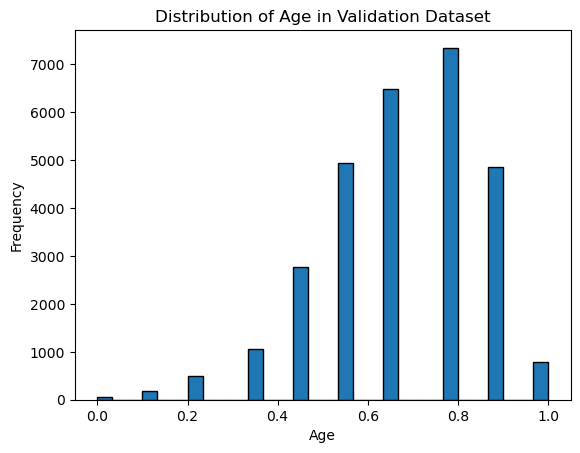

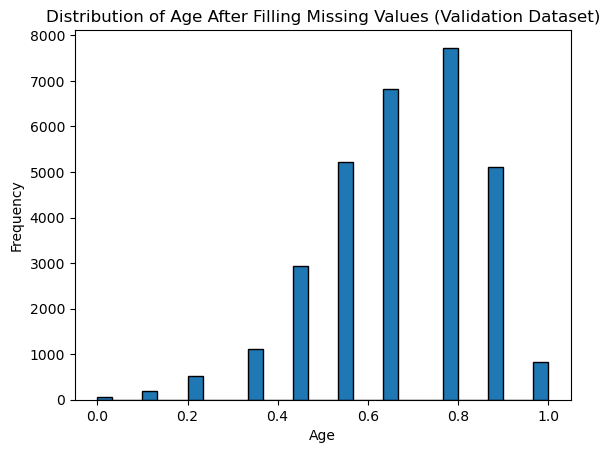

In [63]:
# Step 1: Understand the Existing Distribution
age_column = X_val_scaled['age']
plt.hist(age_column, bins=30, edgecolor='black')
plt.title('Distribution of Age in Validation Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Step 2: Calculate the Percentage of Each Value
age_distribution = age_column.value_counts(normalize=True)

# Step 3: Fill Missing Values Based on Distribution
missing_indices = age_column.isnull()
age_column[missing_indices] = np.random.choice(age_distribution.index, size=missing_indices.sum(), p=age_distribution.values)

# Step 4: Verify the Result
plt.hist(age_column, bins=30, edgecolor='black')
plt.title('Distribution of Age After Filling Missing Values (Validation Dataset)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [64]:
#y_pred_val_nn = model_nn.predict(X_val_scaled)

In [65]:
# Make predictions on the validation data
y_pred_val_lr = model_lr.predict(X_val_scaled)

len(y_pred_val_lr)

30530

In [66]:
df_predictions = pd.DataFrame(index=X_val_scaled.index)

# Add the predictions to the DataFrame
df_predictions['y_pred_val_lr'] = y_pred_val_lr

# Replace 1 with 'Yes' and 0 with 'No' in the 'y_pred_val_lr' column
df_predictions['y_pred_val_lr'] = df_predictions['y_pred_val_lr'].replace({1: 'Yes', 0: 'No'})

# Reset the index to turn it into an actual column
df_predictions.reset_index(inplace=True)

# Specify the file path where you want to save the CSV file
csv_file_path = 'C:/Users/laech/Documents/NOVA IMS/Machine Learning/Project/predictions.csv'

# Export the DataFrame to a CSV file
df_predictions.to_csv(csv_file_path, index=False)

In [67]:
df_predictions

,encounter_id,y_pred_val_lr
0,499502,No
1,447319,No
2,309126,No
3,181183,No
4,359339,No
...,...,...
30525,451150,Yes
30526,549298,Yes
30527,327586,No
30528,351214,No


In [68]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,encounter_id,readmitted_binary
0,499502,No
1,447319,No
2,309126,Yes
3,181183,Yes
4,359339,No
...,...,...
30525,451150,No
30526,549298,Yes
30527,327586,Yes
30528,351214,Yes


In [69]:
X_val_scaled.columns

Index(['gender', 'age', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',
       'number_diagnoses', 'change_in_meds_during_hospitalization',
       'prescribed_diabetes_meds', 'medication',
       'race_Admitted as an inpatient to this hospital',
       'race_Discharged to home', 'race_Discharged/transferred to ICF',
       'race_Discharged/transferred to SNF',
       'race_Discharged/transferred to a federal health care facility.',
       'race_Discharged/transferred to a long term care hospital.',
       'race_Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
       'race_Discharged/transferred to another rehab fac including rehab units of a hospital .',
       'race_Discharged